In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [128]:
%config IPCompleter.greedy=True

In [2]:
tweets = pd.read_csv('train.csv')

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
tweets_accidents = tweets.loc[:,['id','text','target']]

In [6]:
tweets_accidents.head(10)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
5,8,#RockyFire Update => California Hwy. 20 closed...,1
6,10,#flood #disaster Heavy rain causes flash flood...,1
7,13,I'm on top of the hill and I can see a fire in...,1
8,14,There's an emergency evacuation happening now ...,1
9,15,I'm afraid that the tornado is coming to our a...,1


In [7]:
tweet_len = tweets_accidents['text'].str.len()

In [8]:
tweets_accidents['tweet_len'] = tweet_len

In [9]:
tweets_accidents.head()

,id,text,target,tweet_len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88


In [10]:
grouped = tweets_accidents.groupby(['target']).agg({'tweet_len':['mean','max','min','count']})

In [11]:
grouped

tweet_len               
              mean  max min count
target                           
0        95.706817  157   7  4342
1       108.113421  151  14  3271

In [12]:
level0=grouped.columns.get_level_values(0)

In [13]:
level1 = grouped.columns.get_level_values(1)

In [14]:
grouped.columns = level0 + '_' + level1

In [15]:
grouped

,tweet_len_mean,tweet_len_max,tweet_len_min,tweet_len_count
target,,,,
0,95.706817,157,7,4342
1,108.113421,151,14,3271


Text(0, 0.5, 'Longitud del texto')

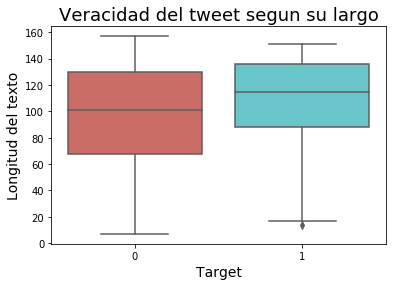

In [16]:
g = sns.boxplot(x="target", y="tweet_len", 
                     data=tweets_accidents, palette="hls")
g.set_title("Veracidad del tweet segun su largo", fontsize=18)
g.set_xlabel("Target", fontsize=14)
g.set_ylabel("Longitud del texto", fontsize=14)

In [17]:
tweets.head(30)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [18]:
tweets_data = tweets.values

In [19]:
tweets_data

array([[1, nan, nan,
        'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
        1],
       [4, nan, nan, 'Forest fire near La Ronge Sask. Canada', 1],
       [5, nan, nan,
        "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
        1],
       ...,
       [10871, nan, nan,
        'M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ',
        1],
       [10872, nan, nan,
        'Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.',
        1],
       [10873, nan, nan,
        'The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d',
        1]], dtype=object)

In [20]:
tweets.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [21]:
tweets_accidents.head(5)

,id,text,target,tweet_len
0,1,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,Forest fire near La Ronge Sask. Canada,1,38
2,5,All residents asked to 'shelter in place' are ...,1,133
3,6,"13,000 people receive #wildfires evacuation or...",1,65
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88


In [22]:
tweets.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [23]:
tweets_keyword = tweets['keyword']

In [24]:
tweets_keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
sinking                  41
harm                     41
body%20bags              41
damage                   41
evacuate                 40
collided                 40
outbreak                 40
siren                    40
windstorm                40
twister                  40
fear                     40
flames                   39
hellfire                 39
weapon                   39
explosion                39
derailment               39
earthquake               39
sinkhole                 39
wrecked                  39
collision                39
famine                   39
weapons                  39
sunk                     39
wreckage                 39
whirlwind                39
fire                     38
fatal                    38
                         ..
hostage                  31
trauma                   31
obliterated              31
avalanche                30
bioterrorism        

In [25]:
tweets_keyword.value_counts(normalize=True)

fatalities               0.005959
armageddon               0.005561
deluge                   0.005561
sinking                  0.005429
harm                     0.005429
body%20bags              0.005429
damage                   0.005429
evacuate                 0.005297
collided                 0.005297
outbreak                 0.005297
siren                    0.005297
windstorm                0.005297
twister                  0.005297
fear                     0.005297
flames                   0.005164
hellfire                 0.005164
weapon                   0.005164
explosion                0.005164
derailment               0.005164
earthquake               0.005164
sinkhole                 0.005164
wrecked                  0.005164
collision                0.005164
famine                   0.005164
weapons                  0.005164
sunk                     0.005164
wreckage                 0.005164
whirlwind                0.005164
fire                     0.005032
fatal         

In [26]:
tweets_keyword.count()

7552

In [27]:
tweets_keyword.size

7613

In [28]:
tweets_keyword_dropped = tweets_keyword.dropna()

In [29]:
tweets_keyword_dropped

31       ablaze
32       ablaze
33       ablaze
34       ablaze
35       ablaze
36       ablaze
37       ablaze
38       ablaze
39       ablaze
40       ablaze
41       ablaze
42       ablaze
43       ablaze
44       ablaze
45       ablaze
46       ablaze
47       ablaze
48       ablaze
49       ablaze
50       ablaze
51       ablaze
52       ablaze
53       ablaze
54       ablaze
55       ablaze
56       ablaze
57       ablaze
58       ablaze
59       ablaze
60       ablaze
         ...   
7553    wrecked
7554    wrecked
7555    wrecked
7556    wrecked
7557    wrecked
7558    wrecked
7559    wrecked
7560    wrecked
7561    wrecked
7562    wrecked
7563    wrecked
7564    wrecked
7565    wrecked
7566    wrecked
7567    wrecked
7568    wrecked
7569    wrecked
7570    wrecked
7571    wrecked
7572    wrecked
7573    wrecked
7574    wrecked
7575    wrecked
7576    wrecked
7577    wrecked
7578    wrecked
7579    wrecked
7580    wrecked
7581    wrecked
7582    wrecked
Name: keyword, Length: 7

In [30]:
tweets_keyword_dropped.size

7552

In [31]:
(tweets_keyword == 'ablaze' ).value_counts()

False    7577
True       36
Name: keyword, dtype: int64

In [32]:
tweets_accidents.corr()

,id,target,tweet_len
id,1.000000,0.060781,0.017393
target,0.060781,1.000000,0.181817
tweet_len,0.017393,0.181817,1.000000


In [33]:
tweets['keyword'].isnull().mean()

0.008012610009194798

In [34]:
tweets.loc[:,['keyword','target']]

,keyword,target
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1
5,NaN,1
6,NaN,1
7,NaN,1
8,NaN,1
9,NaN,1


In [35]:
(tweets_keyword == 'NaN' ).value_counts()

False    7613
Name: keyword, dtype: int64

In [36]:
tweets_not_na_keyword = tweets[tweets.keyword.notna()]

In [102]:
tweets_not_na_keyword.sample()

,id,keyword,location,text,target
4533,6446,injured,Kolkata,Terrorists attack police post; 2 SPOs injured ...,1


In [101]:
tweets.loc[:,['keyword','text']].groupby('keyword')

In [46]:
#por referencia, no es una copia
tweets_len = tweets

In [47]:
tweets_len.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [50]:
tweets_len['text_len']=tweets['text'].str.len()

In [51]:
tweets_len.head(5)

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [66]:
tweets_len.loc[:,['keyword','text','text_len']].groupby('keyword').tail(2)

,keyword,text,text_len
65,ablaze,@nxwestmidlands huge fire at Wholesale markets...,76
66,ablaze,@ablaze what time does your talk go until? I d...,85
100,accident,.@NorwayMFA #Bahrain police had previously die...,124
101,accident,I still have not heard Church Leaders of Kenya...,139
134,aftershock,'The first man gets the oyster the second man ...,78
135,aftershock,Anyone need a P/U tonight? I play Hybrid Slaye...,136
169,airplane%20accident,The shooting or the airplane accident https:/...,62
170,airplane%20accident,Could a drone cause an airplane accident? Pilo...,136
207,ambulance,http://t.co/J8TYT1XRRK Twelve feared killed in...,110
208,ambulance,People who try to j-walk while an ambulance is...,69


In [56]:
tweets_len.corr()

,id,target,text_len
id,1.000000,0.060781,0.017393
target,0.060781,1.000000,0.181817
text_len,0.017393,0.181817,1.000000


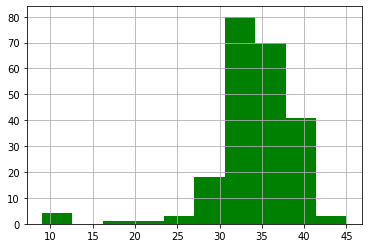

In [63]:
tweets_len.keyword.value_counts().hist(color='green', bins=10)

In [65]:
tweets_len.keyword.value_counts()

fatalities               45
armageddon               42
deluge                   42
sinking                  41
harm                     41
body%20bags              41
damage                   41
evacuate                 40
collided                 40
outbreak                 40
siren                    40
windstorm                40
twister                  40
fear                     40
flames                   39
hellfire                 39
weapon                   39
explosion                39
derailment               39
earthquake               39
sinkhole                 39
wrecked                  39
collision                39
famine                   39
weapons                  39
sunk                     39
wreckage                 39
whirlwind                39
fire                     38
fatal                    38
                         ..
hostage                  31
trauma                   31
obliterated              31
avalanche                30
bioterrorism        

In [69]:
tweets_len_grouped = tweets_len.loc[:,['keyword','text','text_len','target']].groupby('keyword').tail(2)

In [70]:
tweets_len_grouped.head(5)

,keyword,text,text_len,target
65,ablaze,@nxwestmidlands huge fire at Wholesale markets...,76,1
66,ablaze,@ablaze what time does your talk go until? I d...,85,0
100,accident,.@NorwayMFA #Bahrain police had previously die...,124,1
101,accident,I still have not heard Church Leaders of Kenya...,139,0
134,aftershock,'The first man gets the oyster the second man ...,78,0


In [104]:
#porcentaje de keywords que terminan en target 1
keyword_grouped = tweets_len.loc[:,['keyword','target']].groupby('keyword').agg({'target': 'mean'})

In [151]:
keyword_grouped

,target
keyword,
ablaze,0.361111
accident,0.685714
aftershock,0.000000
airplane%20accident,0.857143
ambulance,0.526316
annihilated,0.323529
annihilation,0.344828
apocalypse,0.281250
armageddon,0.119048


Text(0.5, 0, 'Keyword')

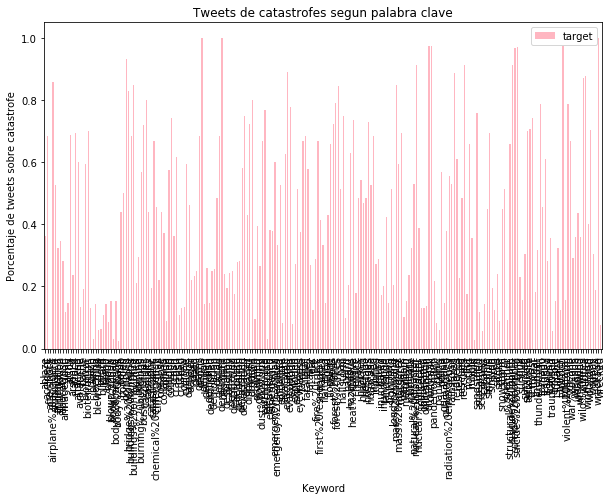

In [105]:
#en el plot se ven la cantidad de veces que una keyword corresponde a un tweet verdadero
keyword_grouped.plot(kind='bar',title='Tweets de catastrofes segun palabra clave',linewidth=2,figsize=(10,6), color='lightpink');
ax=plt.gca()
ax.set_ylabel('Porcentaje de tweets sobre catastrofe');
ax.set_xlabel('Keyword')

In [117]:
#Filtramos los de porcentaje bajo
keyword_grouped['target'] == 0

keyword
ablaze                 False
accident               False
aftershock              True
airplane%20accident    False
ambulance              False
annihilated            False
annihilation           False
apocalypse             False
armageddon             False
army                   False
arson                  False
arsonist               False
attack                 False
attacked               False
avalanche              False
battle                 False
bioterror              False
bioterrorism           False
blaze                  False
blazing                False
bleeding               False
blew%20up              False
blight                 False
blizzard               False
blood                  False
bloody                 False
blown%20up             False
body%20bag             False
body%20bagging         False
body%20bags            False
                       ...  
survivors              False
terrorism              False
terrorist              False
threat

In [133]:
keyword_grouped['target'].dtypes

dtype('float64')

In [142]:
keyword_grouped['target'].nlargest(5)

keyword
debris         1.000000
derailment     1.000000
wreckage       1.000000
outbreak       0.975000
oil%20spill    0.973684
Name: target, dtype: float64

Text(0.5, 0, 'Keyword')

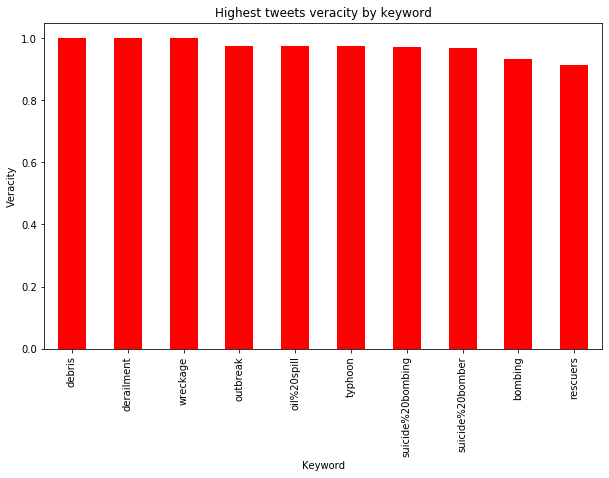

In [170]:
#top 10 keyword con mayor veracidad
keyword_grouped['target'].nlargest(10).plot(kind='bar',title='Highest tweets veracity by keyword',linewidth=2,figsize=(10,6), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

Text(0.5, 0, 'Keyword')

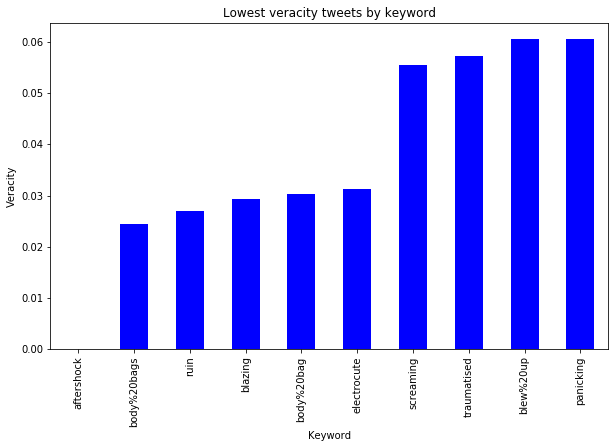

In [167]:
#top 10 keyword con mayor veracidad
keyword_grouped['target'].nsmallest(10).plot(kind='bar',title='Lowest veracity tweets by keyword',linewidth=2,figsize=(10,6), color='blue');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

In [166]:
#Filtro por los keyword de mayor veracidad
Higher_avg_keyword_grouped = keyword_grouped[keyword_grouped.target > 0.75]

Text(0.5, 0, 'Keyword')

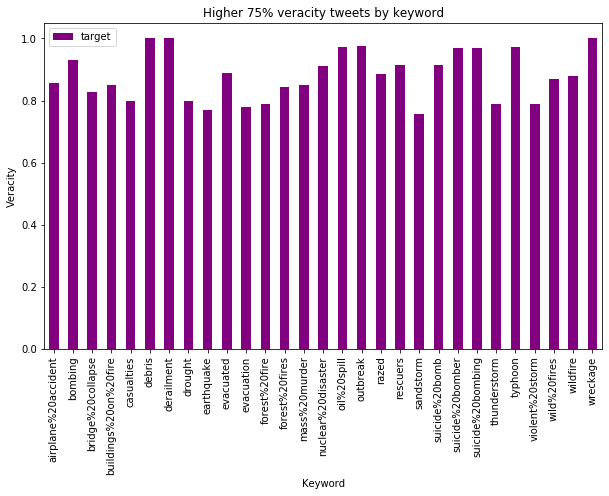

In [175]:
Higher_avg_keyword_grouped.plot(kind='bar',title='Higher 75% veracity tweets by keyword',linewidth=2,figsize=(10,6), color='purple');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

In [173]:
#Filtro por los keyword de menor veracidad
Lower_avg_keyword_grouped = keyword_grouped[keyword_grouped.target < 0.25]

Text(0.5, 0, 'Keyword')

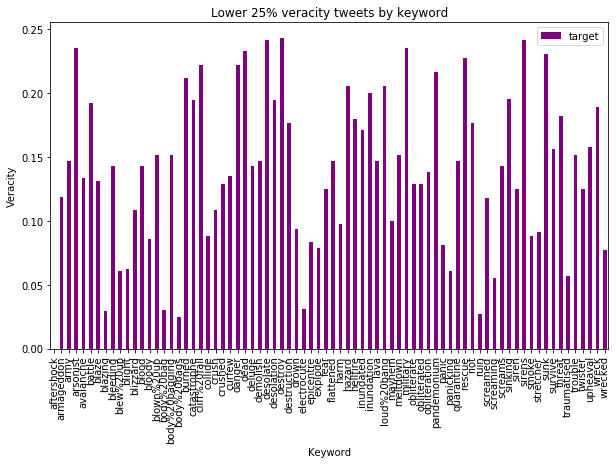

In [176]:
Lower_avg_keyword_grouped.plot(kind='bar',title='Lower 25% veracity tweets by keyword',linewidth=2,figsize=(10,6), color='purple');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd1690fcf8>]],
      dtype=object)

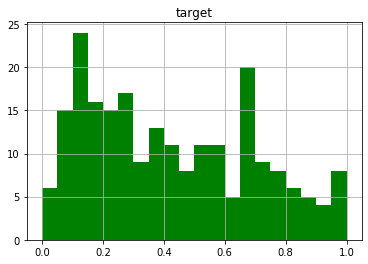

In [179]:
#cantidad de keyword por target
keyword_grouped.hist(color='green', bins=20)

In [188]:
#
#keyword_grouped.plot.scatter('target','keyword', title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));
#ax=plt.gca()
#ax.set_ylabel('Age')
#ax.set_xlabel('Year');

In [220]:
keyword_grouped_std = tweets_len.loc[:,['keyword','target']].groupby('keyword').agg({'target': ['count','mean','std']})

In [221]:
keyword_grouped_std.head(5)

target                    
                     count      mean       std
keyword                                       
ablaze                  36  0.361111  0.487136
accident                35  0.685714  0.471008
aftershock              34  0.000000  0.000000
airplane%20accident     35  0.857143  0.355036
ambulance               38  0.526316  0.506009

In [222]:
level0=keyword_grouped_std.columns.get_level_values(0)

In [223]:
level1=keyword_grouped_std.columns.get_level_values(1)

In [224]:
keyword_grouped_std.columns = level0 + '_' + level1

In [227]:
keyword_grouped_std.head(5)

,target_count,target_mean,target_std
keyword,,,
ablaze,36,0.361111,0.487136
accident,35,0.685714,0.471008
aftershock,34,0.000000,0.000000
airplane%20accident,35,0.857143,0.355036
ambulance,38,0.526316,0.506009


In [245]:
keyword_grouped_std.target_count.nlargest(5)

keyword
fatalities     45
armageddon     42
deluge         42
body%20bags    41
damage         41
Name: target_count, dtype: int64

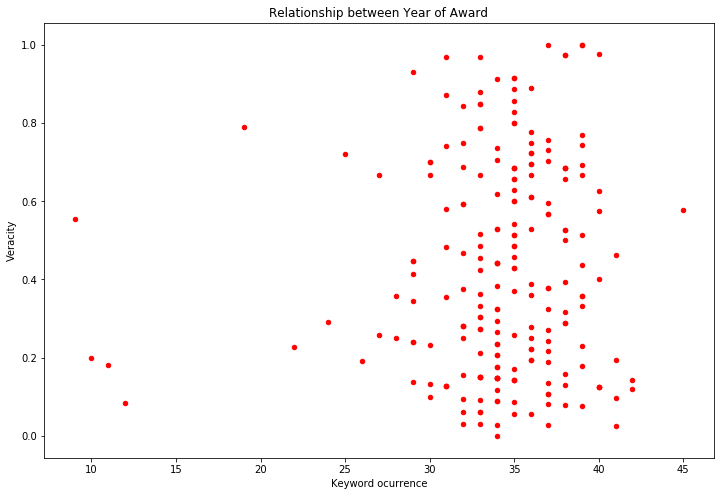

In [239]:
#Veracidad segun la cantidad de veces que aparece una keyword
keyword_grouped_std.plot.scatter('target_count','target_mean', title='Relationship between Veracity and keyword frequency',figsize=(12,8), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity')
ax.set_xlabel('Keyword frequency');

Text(0, 0.5, 'Veracity')

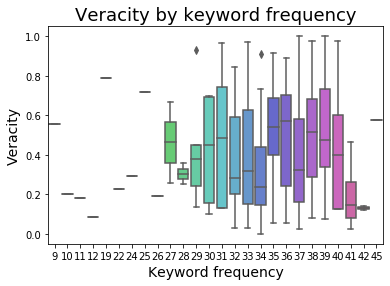

In [248]:
#veracidad segun la cantidad de apariciones del keyword
g = sns.boxplot(x="target_count", y="target_mean", 
                     data=keyword_grouped_std, palette="hls")
g.set_title("Veracity by keyword frequency", fontsize=18)
g.set_xlabel("Keyword frequency", fontsize=14)
g.set_ylabel("Veracity", fontsize=14)

In [274]:
true_or_false_keyword = keyword_grouped_std[(keyword_grouped_std['target_mean'] == 0) | (keyword_grouped_std['target_mean'] == 1 )]

In [275]:
true_or_false_keyword

,target_count,target_mean,target_std
keyword,,,
aftershock,34,0.0,0.0
debris,37,1.0,0.0
derailment,39,1.0,0.0
wreckage,39,1.0,0.0


Text(0.5, 0, 'Keyword')

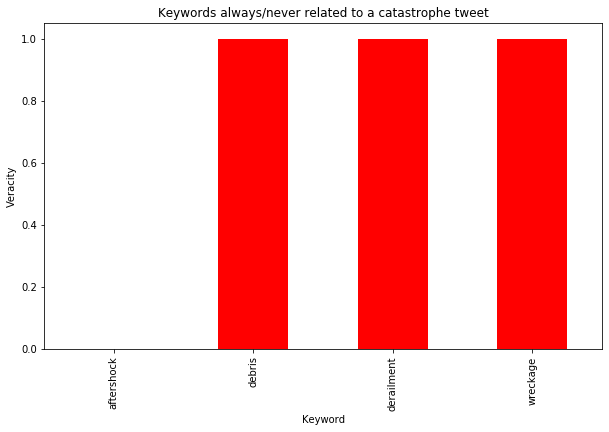

In [278]:
#Keywords que siemre son verdad o no
true_or_false_keyword.target_mean.plot(kind='bar',title='Keywords always/never related to a catastrophe tweet',linewidth=2,figsize=(10,6), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')

In [336]:
def contador_keyword(lista,keyword):
    contador = 0
    for word in lista:
        if (word == keyword):
            contador = contador+1
    return contador

In [282]:
tweets.head(5)

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [295]:
tweets_len.loc[:,['keyword','text']].head(5)

,keyword,text
0,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,All residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,Just got sent this photo from Ruby #Alaska as ...


In [344]:
#no funca
tweets_len['keyword_count']=tweets_len.text.agg(lambda x: contador_keyword(x.split(),'ablaze'))

In [345]:
tweets_len['keyword_count'].value_counts()

0    7595
1      18
Name: keyword_count, dtype: int64

In [348]:
del tweets['text_len']

In [349]:
del tweets['keyword_count']

In [350]:
tweets.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [351]:
#veracidad keyword NaN vs no Nan
tweets['keyword'].isnull().sum()

61

In [353]:
tweets['keyword'].isnull().mean()

0.008012610009194798

In [366]:
nan_kw_tweets = tweets[tweets['keyword'].isnull()]

In [370]:
nan_kw_tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [369]:
#quiero que incluya a los NaN
nan_kw_tweets.loc[:,['keyword','target']].groupby('keyword').agg({'target': 'mean'})

,target
keyword,
